In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
#import a dataset
df = pd.read_csv(r"C:\Users\Lara\Documents\Ironhack\Course\Labs\statistics\amazon.csv")
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [3]:
#Part 1: Analyzing Best-Seller Trends Across Product Categories
#1.Create a crosstab between the product category and the isBestSeller status.

crosstab = pd.crosstab(df['category'], df['isBestSeller'])
crosstab

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [4]:
#Are there categories where being a best-seller is more prevalent?
#Hint: one option is to calculate the proportion of best-sellers for each category 
#and then sort the categories based on this proportion in descending order.

category_counts = df.groupby('category')['isBestSeller'].mean().sort_values(ascending=False) 
category_counts

#The categories where being a best-seller is more prevalent are: Grocery, Smart Home Security & Lighting, Health & Personal Care, Mobile Phone Accessories, Power & Hand Tools.

category
Grocery                             0.058135
Smart Home Security & Lighting      0.057692
Health & Personal Care              0.057686
Mobile Phone Accessories            0.042471
Power & Hand Tools                  0.035339
                                      ...   
CD, Disc & Tape Players             0.000000
General Music-Making Accessories    0.000000
Snowboard Boots                     0.000000
Boxes & Organisers                  0.000000
eBook Readers & Accessories         0.000000
Name: isBestSeller, Length: 296, dtype: float64

In [5]:
#2. Statistical Tests:
from scipy.stats import chi2_contingency

#Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab)
chi2_statistic, chi2_p_value

#there seems to be a significant relationship between the categorical variables considered in the chi-square test.

(36540.20270061387, 0.0)

In [6]:

#Compute Cramér's V to understand the strength of association between best-seller status and category.
from scipy.stats.contingency import association

association(crosstab, method="cramer")

#The value of 0.1222 suggests a weak association between the categorical variables in your contingency table. This means that the variables are only weakly related to each other.

0.1222829439760564

<Axes: xlabel='category'>

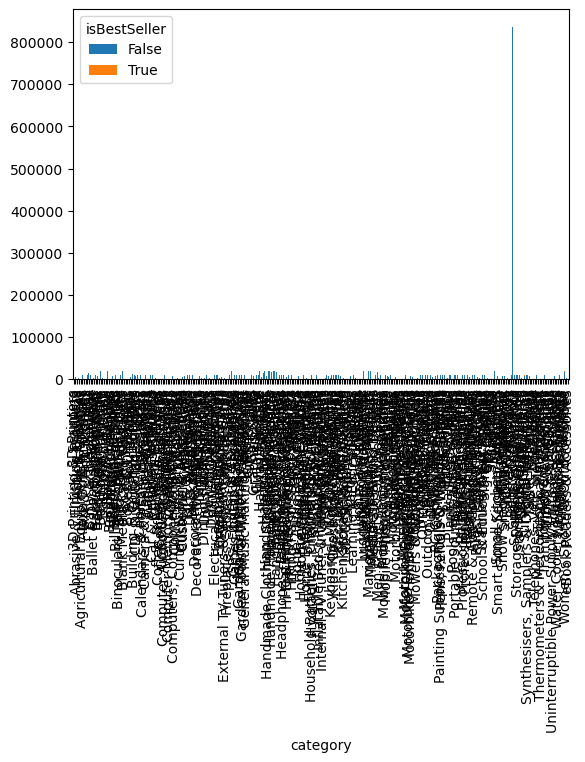

In [7]:
#3 Visualizations:
#Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

crosstab.plot(kind="bar", stacked=True)

In [20]:
#Part 2: Exploring Product Prices and Ratings Across Categories and Brands
#0.Preliminary Step: Remove outliers in product prices.
#For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.
#Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.

Q1 = df['price'].quantile(0.25)  
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_filtered = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]



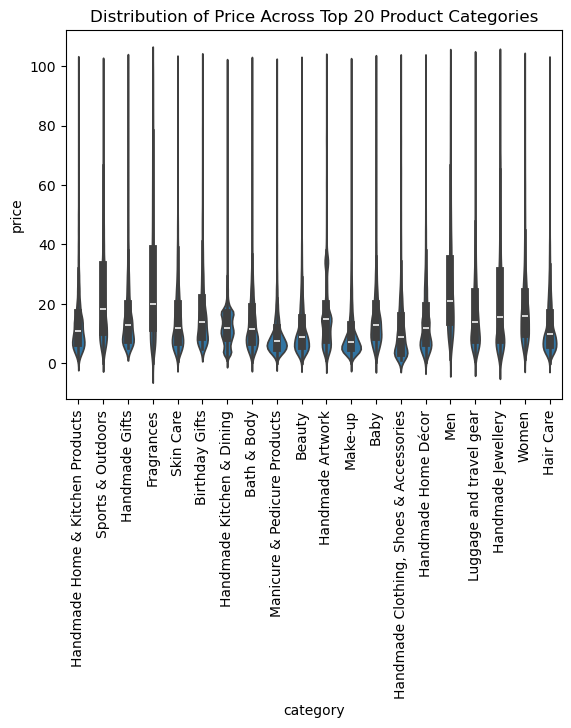

In [21]:
#1.Violin Plots:
#Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.

top_20_categories = df_filtered['category'].value_counts().nlargest(20).index
sns.violinplot(x='category', y='price', data=df_filtered[df_filtered['category'].isin(top_20_categories)])
plt.xticks(rotation=90)
plt.title('Distribution of Price Across Top 20 Product Categories')
plt.show()

#Determine which product category tends to have the highest median price
median_prices = df.groupby('category')['price'].median().sort_values(ascending=False)
highest_median_category = median_prices.index[0]

#Which product category tends to have the highest median price? Don't filter here by top categories.

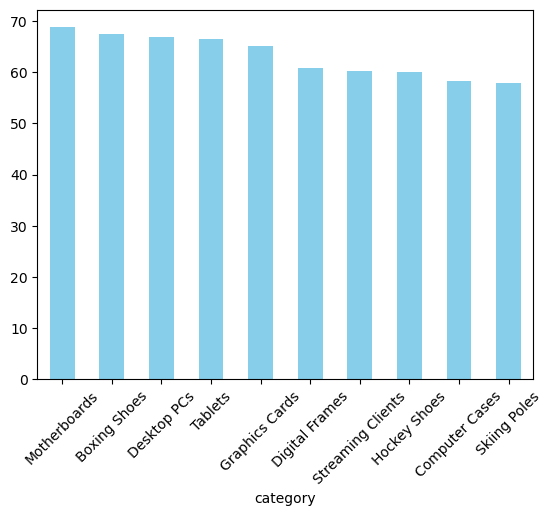

In [22]:
#2.Bar Charts:
#Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
top_10_price_avg = df_filtered.groupby('category')['price'].mean().nlargest(10)
top_10_price_avg.plot(kind='bar', color='skyblue')
plt.xticks(rotation=45)
plt.show()

#Which product category commands the highest average price? Don't filter here by top categories. Is motherboards.

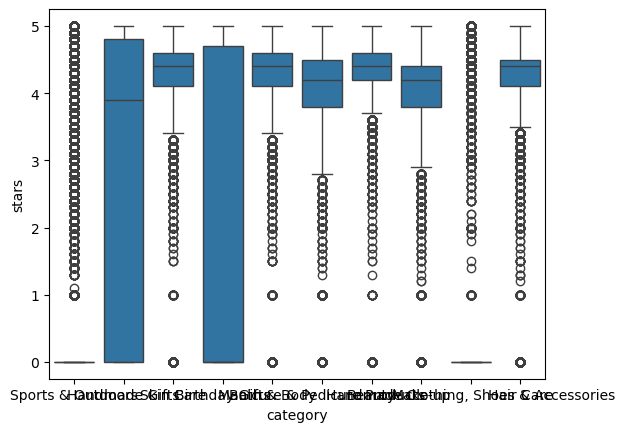

In [25]:
#Box Plots:
#Visualize the distribution of product ratings based on their category using side-by-side box plots. 
#Filter out the top 10 categories based on count for better visualization.
top_10_cat = df_filtered['category'].value_counts().nlargest(10).index
sns.boxplot(x='category', y='stars', data=df_filtered[df_filtered['category'].isin(top_10_cat)])
plt.show()



In [28]:
#Part 3: Investigating the Interplay Between Product Prices and Ratings
#1. Correlation Coefficients:
#Calculate the correlation coefficient between price and stars.
correlation = df_filtered['price'].corr(df_filtered['stars'], method='spearman')
correlation

#Is there a significant correlation between product price and its rating?
#As the correlation coefficient is close to 0, there is no significant linear correlation between product price and its rating.


-0.06679697280768314

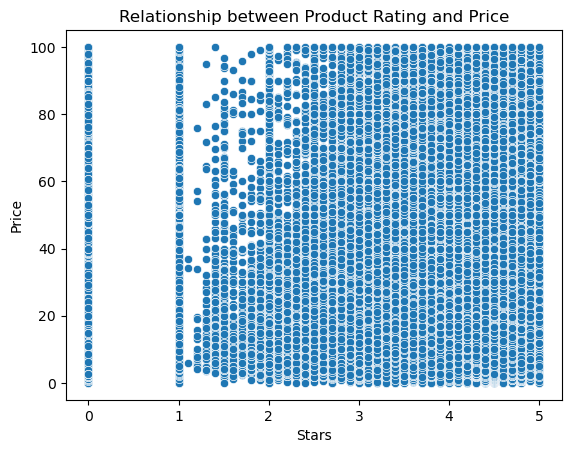

In [38]:
#2. Visualizations:
#Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
sns.scatterplot(x='stars', y='price', data=df_filtered)
plt.title('Relationship between Product Rating and Price')
plt.xlabel('Stars')
plt.ylabel('Price')
plt.show()

<Axes: xlabel='isBestSeller', ylabel='category'>

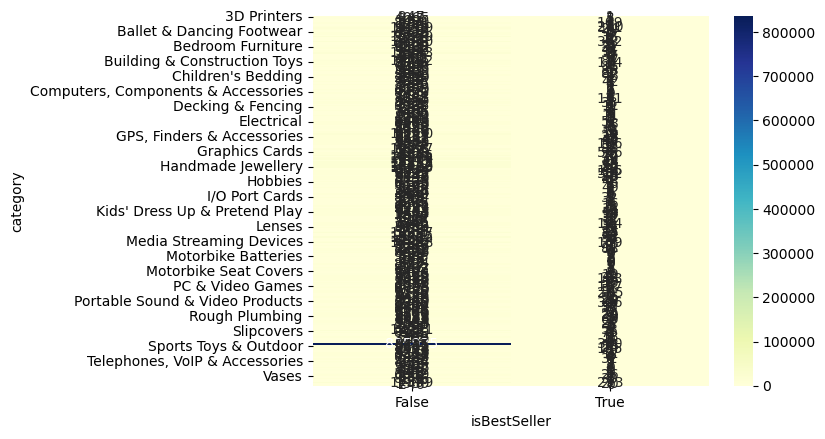

In [41]:
#Use a correlation heatmap to visualize correlations between all numerical variables.
sns.heatmap(crosstab, annot=True, cmap="YlGnBu", fmt="d")

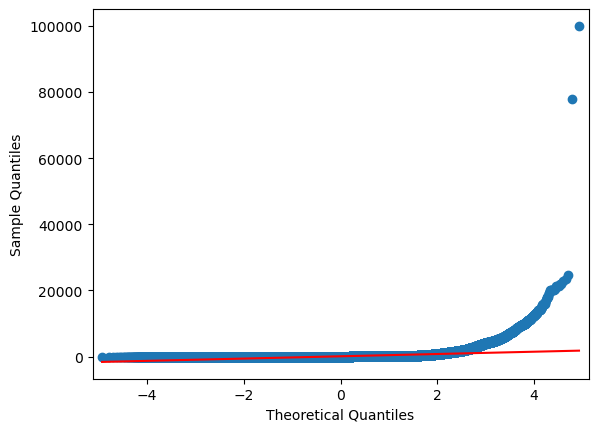

In [40]:
#3.Examine if product prices typically follow a normal distribution using a QQ plot.
import statsmodels.api as sm

# Generating a Q-Q plot for 'price' to check if its distribution follows a normal distribution
sm.qqplot(df['price'], line='s');